In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np


Call Covered

In [40]:
# Define the stock symbol and the number of shares you own
stock_symbol = "AAPL"
shares_owned = 100


In [3]:
# Fetch historical stock price data
stock = yf.Ticker(stock_symbol)
stock_data = stock.history(period="1y")  # Adjust the period as needed

In [42]:
stock_data.std()

Open            1.918329e+01
High            1.895796e+01
Low             1.941074e+01
Close           1.915926e+01
Volume          2.152195e+07
Dividends       2.949438e-02
Stock Splits    0.000000e+00
dtype: float64

In [43]:
stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-11 00:00:00-04:00,139.074942,140.516403,137.404857,138.160370,77033700,0.0,0.0
2022-10-12 00:00:00-04:00,138.309504,139.532246,137.345223,137.524155,70433700,0.0,0.0
2022-10-13 00:00:00-04:00,134.193923,142.743196,133.577569,142.146744,113224000,0.0,0.0
2022-10-14 00:00:00-04:00,143.458940,143.667708,137.375037,137.563919,88598000,0.0,0.0
2022-10-17 00:00:00-04:00,140.238066,142.057260,139.442781,141.570160,85250900,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-04 00:00:00-04:00,171.089996,174.210007,170.970001,173.660004,53020300,0.0,0.0
2023-10-05 00:00:00-04:00,173.789993,175.449997,172.679993,174.910004,48527900,0.0,0.0
2023-10-06 00:00:00-04:00,173.800003,177.990005,173.179993,177.490005,57224100,0.0,0.0


In [31]:
# Define the call option details
call_strike_price = 50.00
call_expiration_date = "2023-12-31"  # YYYY-MM-DD format
call_premium =  128.10# Premium received for selling the call option

In [32]:
# Calculate the profit and loss for the covered call strategy over time
stock_investment = shares_owned * stock_data['Close']
call_investment = -shares_owned * call_premium
covered_call_profit = stock_investment + call_investment

In [33]:
# Calculate the maximum potential profit for the covered call over time
max_profit = (call_strike_price - stock_data['Close'] + call_premium) * shares_owned

In [23]:
max_profit.tail()

Date
2023-10-04 00:00:00-04:00    463.999634
2023-10-05 00:00:00-04:00    338.999634
2023-10-06 00:00:00-04:00     80.999451
2023-10-09 00:00:00-04:00    -69.000549
2023-10-10 00:00:00-04:00     -8.999939
Name: Close, dtype: float64

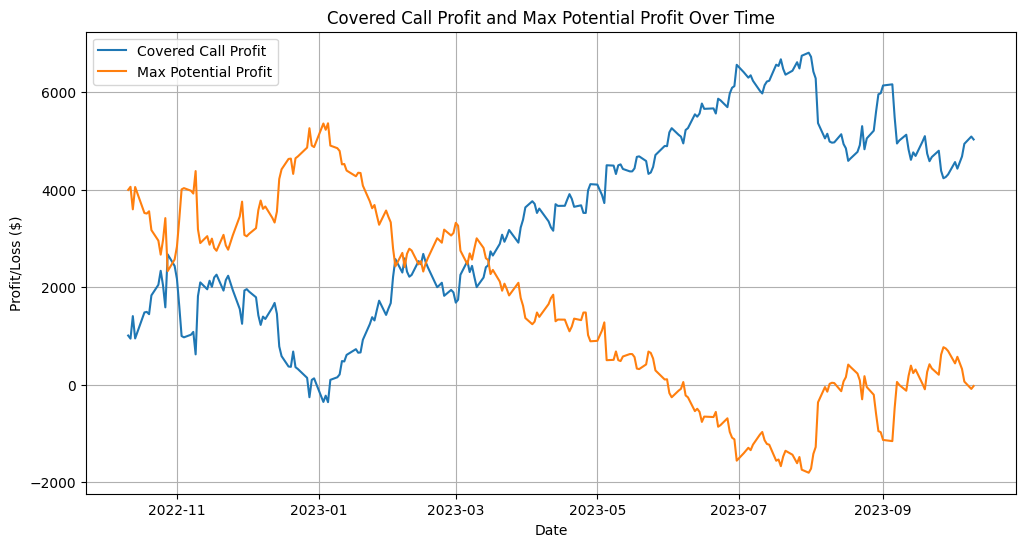

In [34]:
# Create a figure for the covered call profit and the maximum potential profit
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, covered_call_profit, label="Covered Call Profit")
plt.plot(stock_data.index, max_profit, label="Max Potential Profit")
plt.xlabel("Date")
plt.ylabel("Profit/Loss ($)")
plt.title("Covered Call Profit and Max Potential Profit Over Time")
plt.legend()
plt.grid(True)

# Show the visualization
plt.show()

Put Protective

In [35]:
# Define the protective put details
put_strike_price = 105.00
put_expiration_date = "2023-12-31"  # YYYY-MM-DD format
put_premium = 0.01  # Premium paid for buying the put option


In [36]:
# Calculate the profit and loss for the protective put strategy
stock_investment = shares_owned * stock_data['Close']
put_investment = -shares_owned * put_premium
protective_put_profit = stock_investment + put_investment


In [38]:
protective_put_profit

Date
2022-10-11 00:00:00-04:00    13815.036987
2022-10-12 00:00:00-04:00    13751.415466
2022-10-13 00:00:00-04:00    14213.674377
2022-10-14 00:00:00-04:00    13755.391907
2022-10-17 00:00:00-04:00    14156.015991
                                 ...     
2023-10-04 00:00:00-04:00    17365.000366
2023-10-05 00:00:00-04:00    17490.000366
2023-10-06 00:00:00-04:00    17748.000549
2023-10-09 00:00:00-04:00    17898.000549
2023-10-10 00:00:00-04:00    17837.999939
Name: Close, Length: 251, dtype: float64

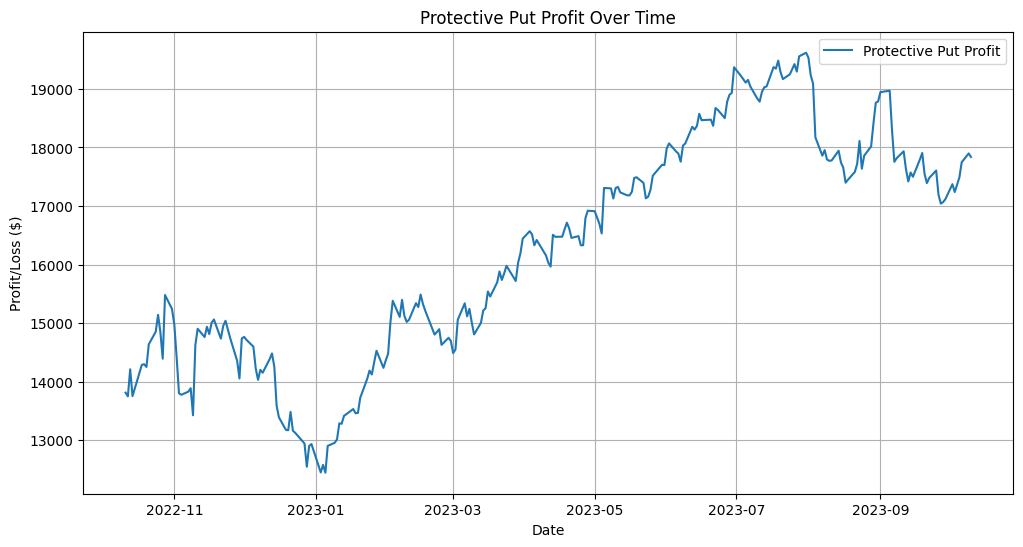

In [37]:
# Create a figure for the protective put profit
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, protective_put_profit, label="Protective Put Profit")
plt.xlabel("Date")
plt.ylabel("Profit/Loss ($)")
plt.title("Protective Put Profit Over Time")
plt.legend()
plt.grid(True)

# Show the visualization
plt.show()

Taylor Expansion finance

In [48]:
import numpy as np 
from scipy.stats import norm

In [71]:
# Define option parameters
S = 178.38 # Current stock price
K = 50.00  # Strike price
r = 0.058  # Risk-free interest rate
T = 3/12 # Time to expiration (in years)
σ = 0.24  # Volatility


In [72]:
# Calculate d1 and d2 for the Black-Scholes formula
d1 = (np.log(S / K) + (r + (σ ** 2) / 2) * T) / (σ * np.sqrt(T))
d2 = d1 - σ * np.sqrt(T)

In [73]:
# Black-Scholes call option price
C0 = S * np.exp(-r * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Calculate the first and second derivatives using the Taylor expansion
ΔS = norm.cdf(d1)
Γ = norm.pdf(d1) / (S * σ * np.sqrt(T))

In [74]:
print(f"Black-Scholes Call Option Price: {C0:.2f}")
print(f"Delta: {ΔS:.4f}")
print(f"Gamma: {Γ:.4f}")

Black-Scholes Call Option Price: 126.53
Delta: 1.0000
Gamma: 0.0000
